### 1. Load the data into the pandas environment and identify some basic details of the dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('employee.csv')
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
data.shape

(9, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

### 2. Reset the index as 'name'

In [6]:
data=data.set_index('name')
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills

In [7]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”

In [8]:
data.loc[data['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score

In [9]:
data.loc[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [10]:
data.loc[(data['performance_score'] >500) & (data['performance_score'] < 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

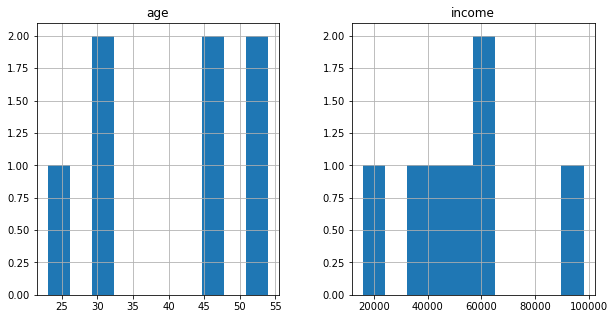

In [11]:
fregraph=data.select_dtypes(include=["float"])
fregraph.hist(figsize=(10,5))
plt.show()


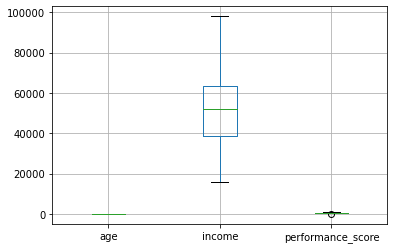

In [12]:
data.boxplot()
plt.show()

In [13]:
# there is no outliers for age and income so we can fill using mean or median

In [14]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [15]:
data['age']=data['age'].fillna(data['age'].median())

In [16]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [17]:
data['income']=data['income'].fillna(data['income'].median())
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,NaN,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,NaN,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [18]:
data_types_dict = {'age': int,
                  'income': int}
data = data.astype(data_types_dict)
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45,52000,NaN,Operations,G3,723
S Kumar,45,16000,F,Finance,G0,520
Jack Morgan,32,35000,M,Finance,G2,674
Ying Chin,45,65000,F,Sales,G3,556
Dheeraj Patel,30,42000,F,Operations,G2,711


In [19]:
data=data.fillna({'gender':'M'}, limit=2)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45,52000,M,Operations,G3,723
S Kumar,45,16000,F,Finance,G0,520
Jack Morgan,32,35000,M,Finance,G2,674
Ying Chin,45,65000,F,Sales,G3,556
Dheeraj Patel,30,42000,F,Operations,G2,711
Satyam Sharma,45,62000,M,Sales,G3,649
James Authur,54,52000,F,Operations,G3,53
Josh Wills,54,52000,F,Finance,G3,901
Leo Duck,23,98000,M,Sales,G4,709


### 8. Check the outliers and handle outliers in performance score using Percentiles.


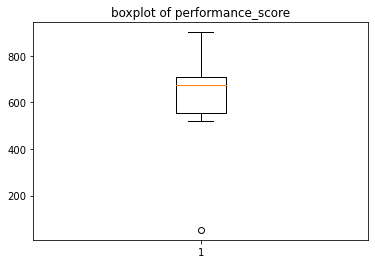

In [20]:
plt.boxplot(data['performance_score'])
plt.title('boxplot of performance_score')
plt.show()

In [21]:
# here outlier is present, we use inter quartile range to manage outliers in data, for that we have to find q1,q2,q3
Q1 = np.percentile(data['performance_score'],25)
Q2 = np.percentile(data['performance_score'],50)
Q3 = np.percentile(data['performance_score'],75)

In [22]:
print('Q1 =',Q1)
print('Q2 =',Q2)
print('Q3 =',Q3)

Q1 = 556.0
Q2 = 674.0
Q3 = 711.0


In [23]:
#find Inter Quartile Range,then remove values below lower limit and above upper limit of IQR
IQR=Q3-Q1

In [24]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [25]:
print('upper limit=',up_lim)
print('lower limit=',low_lim)

upper limit= 943.5
lower limit= 323.5


In [26]:
outlier=[]
for x in data['performance_score']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [27]:
outlier

[53]

In [28]:
ind=data['performance_score']< low_lim
data.loc[ind].index

Index(['James Authur'], dtype='object', name='name')

In [29]:
data.drop(['James Authur'],inplace=True)
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45,52000,M,Operations,G3,723
S Kumar,45,16000,F,Finance,G0,520
Jack Morgan,32,35000,M,Finance,G2,674
Ying Chin,45,65000,F,Sales,G3,556
Dheeraj Patel,30,42000,F,Operations,G2,711
Satyam Sharma,45,62000,M,Sales,G3,649
Josh Wills,54,52000,F,Finance,G3,901
Leo Duck,23,98000,M,Sales,G4,709


### 9. Check the gender column and do Dummy encoding.

In [30]:
data['gender']

name
Allen Smith      M
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    M
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [31]:
data1 = pd.get_dummies(data,columns=['gender'],drop_first=True)
data1

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45,52000,Operations,G3,723,1
S Kumar,45,16000,Finance,G0,520,0
Jack Morgan,32,35000,Finance,G2,674,1
Ying Chin,45,65000,Sales,G3,556,0
Dheeraj Patel,30,42000,Operations,G2,711,0
Satyam Sharma,45,62000,Sales,G3,649,1
Josh Wills,54,52000,Finance,G3,901,0
Leo Duck,23,98000,Sales,G4,709,1


### 10.Do the standard scaling on the feature performance score.

In [32]:
data.describe()

,age,income,performance_score
count,8.000000,8.000000,8.00000
mean,39.875000,52750.000000,680.37500
std,10.343217,24099.496142,116.16729
min,23.000000,16000.000000,520.00000
25%,31.500000,40250.000000,625.75000
50%,45.000000,52000.000000,691.50000
75%,45.000000,62750.000000,714.00000
max,54.000000,98000.000000,901.00000


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
standardization=StandardScaler()
data1['performance_score'] =standardization.fit_transform(data1[['performance_score']])
data1

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45,52000,Operations,G3,0.392262,1
S Kumar,45,16000,Finance,G0,-1.475872,0
Jack Morgan,32,35000,Finance,G2,-0.058667,1
Ying Chin,45,65000,Sales,G3,-1.144578,0
Dheeraj Patel,30,42000,Operations,G2,0.281831,0
Satyam Sharma,45,62000,Sales,G3,-0.288733,1
Josh Wills,54,52000,Finance,G3,2.030331,0
Leo Duck,23,98000,Sales,G4,0.263425,1
